<h1> Mandatory assignment 1 </h>



In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

BS to get Vs code to notice venv in workspace:

uv run python -m ipykernel install --user --name=oblig1 --display-name "Python (.venv oblig1)"

<h2> Exercise 1 </h2>

Read the CSV file in Pandas and create a DataFrame named Grc_df. What is the number of
rows and columns in Grc_df? Print the first 10 and last 10 rows of Grc_df.


In [2]:
Grc_df = pd.read_csv('./Grocery_dataset.csv')

## Number of rows and columns in Grc_df
print("Columns, rows")
print(Grc_df.shape)
#Grc_df.info()

Columns, rows
(5000, 12)


In [3]:
# Show the first 10 rows
Grc_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
# Show the last 10 rows
Grc_df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4990,FDE46,18.60,Low Fat,0.015859,Snack Foods,152.9366,OUT017,2007,NaN,Tier 2,Supermarket Type1,453.4098
4991,NCQ53,17.60,Low Fat,0.018905,Health and Hygiene,234.6590,OUT046,1997,Small,Tier 1,Supermarket Type1,8508.9240
4992,NCN42,20.25,Low Fat,0.014281,Household,148.0418,OUT018,2009,Medium,Tier 3,Supermarket Type2,1177.1344
4993,DRH11,5.98,Low Fat,0.075675,Hard Drinks,53.3614,OUT049,1999,Medium,Tier 1,Supermarket Type1,331.5684
4994,NCI42,18.75,Low Fat,0.010382,Household,207.8954,OUT049,1999,Medium,Tier 1,Supermarket Type1,2292.3494
4995,FDT07,5.82,Regular,0.077476,Fruits and Vegetables,255.3330,OUT045,2002,NaN,Tier 2,Supermarket Type1,4870.3270
4996,DRL60,8.52,Low Fat,0.027059,Soft Drinks,153.3682,OUT046,1997,Small,Tier 1,Supermarket Type1,914.8092
4997,FDG20,15.50,Regular,0.126200,Fruits and Vegetables,178.4028,OUT018,2009,Medium,Tier 3,Supermarket Type2,1239.7196
4998,FDF56,16.70,Regular,0.119462,Fruits and Vegetables,182.7976,OUT046,1997,Small,Tier 1,Supermarket Type1,1810.9760
4999,FDV33,9.60,Regular,0.027455,Snack Foods,258.1304,OUT018,2009,Medium,Tier 3,Supermarket Type2,2324.9736


<h2>Exercise 2 </h2>

Are there any null values in the Grc_df? If yes, then in which columns and how many?
Finally, handle these null values using any strategy shown during the labs.


In [5]:
#find null values and post what columns have null values
Grc_df.isnull().sum()

#handle these null values

Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# WARNING !! What the data is going to be used for is neccessary to determinge the correct approach. 
#   Using the mean is incorrect as it biases the data and removes patterns. 
#   Leaving the missing values as is, is the correct choice if using a model that handles missing values. 
#   Removing rows with missing values is also an option, but it can lead to loss of valuable information. 
# Blindly applying a strategy without understanding the data and its context can lead to incorrect conclusions and poor model performance.

Grc_df.dropna(inplace=True)

Grc_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<h2>Exercise 3 </h2>

How many unique Outlet Sizes are there in the Grc_df? Which outlet size is maximum, and
which is minimum?

In [7]:
Grc_df["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [8]:
# Conceptually Outlet_size is of the datatype object and Pandas cannot know the min and max values of an object datatype. Unless it randomly choses the correct order or the scale is specified or it is somehow indexed.

print("Min:", Grc_df["Outlet_Size"].min())
print("Max:", Grc_df["Outlet_Size"].max())

Min: High
Max: Small


<h2> Exercise 4 </h2>

How many unique Item Fat Content types are in the Grc_df? List them. Do you see any
issues with the Item Fat Content types? If yes, then handle this issue.

In [9]:
Grc_df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [10]:
# The item fat content types are not consistently named. This causes Pandas to interpret it as five separate categories instead of 2. 



Grc_df["Item_Fat_Content"] = Grc_df["Item_Fat_Content"].replace({"low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"})

Grc_df["Item_Fat_Content"].unique()


# Extra: Assigning the column all 3 possible values can help create consistent tables in some caseses, where you would like the table to show 0 "High Fat". Otherwise it has no knowledge of the category.

# fat_content_cat = pd.CategoricalDtype(categories=["Low Fat", "Regular", "High Fat"], ordered=True)
# Grc_df["Item_Fat_Content"] = Grc_df["Item_Fat_Content"].astype(fat_content_cat)



array(['Low Fat', 'Regular'], dtype=object)

<h2> Exercise 5 </h2>

Drop the columns having index values of 0, 6 and create a new DataFrame Grc_new_df.

In [11]:
Grc_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [12]:

##drop 0 and 6'th column
print("Grc_df",Grc_df.shape)
#Tuple of columns to be dropped.
Grc_new_df = Grc_df.drop(Grc_df.columns[[0, 6]], axis=1)
print("Grc_new_df",Grc_new_df.shape)

Grc_df (2743, 12)
Grc_new_df (2743, 10)


In [13]:
Grc_new_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088


<h2> Exercise 6 </h2>

Using different Supermarket type listed in the column Outlet_Type create two different
DataFrames from Grc_new_df. Name these DataFrames as SupType_1 and SupType_2.

In [14]:
Grc_new_df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2'], dtype=object)

In [15]:
# Warning: SubType is breaking the naming convention

SupType_1 = Grc_new_df[Grc_new_df["Outlet_Type"] == "Supermarket Type1"]
SupType_2 = Grc_new_df[Grc_new_df["Outlet_Type"] == "Supermarket Type2"]
print(SupType_1["Outlet_Type"].unique())
print(SupType_2["Outlet_Type"].unique())

['Supermarket Type1']
['Supermarket Type2']


<h2> Exercise 7 </h2>

Using Seaborn (“ggplot style”) # R programming language style something whatever that i supposed to mean.<br>
create a (2,1) subplot of a box plot <br>
showing 5-point summary of the column Item_MRP <br>
for SupType_1 and SupType_2. <br>

Which Outlet Type has a higher median MRP? Are there any outliers?

<Axes: xlabel='Item_MRP'>

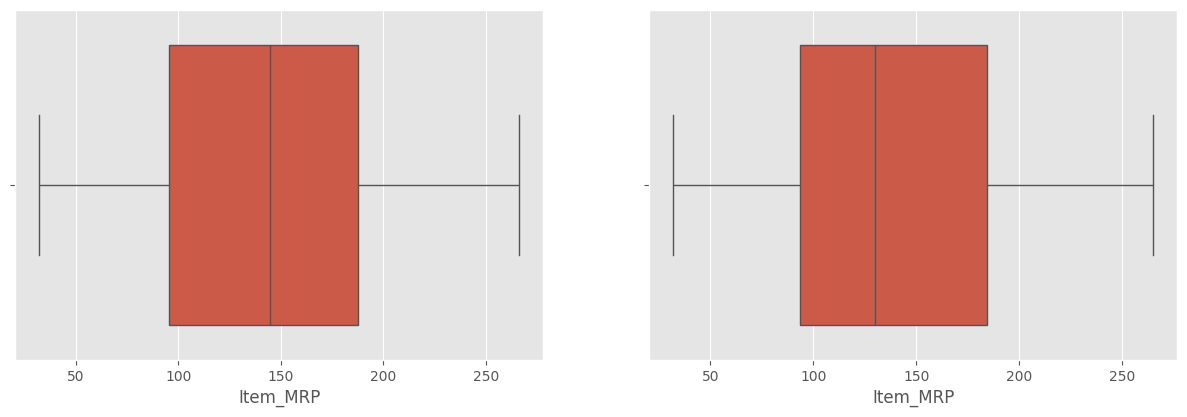

In [16]:
plt.style.use('ggplot')
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Item_MRP',  data=SupType_1)
plt.subplot(2,2,2)
sns.boxplot(x='Item_MRP',  data=SupType_2)


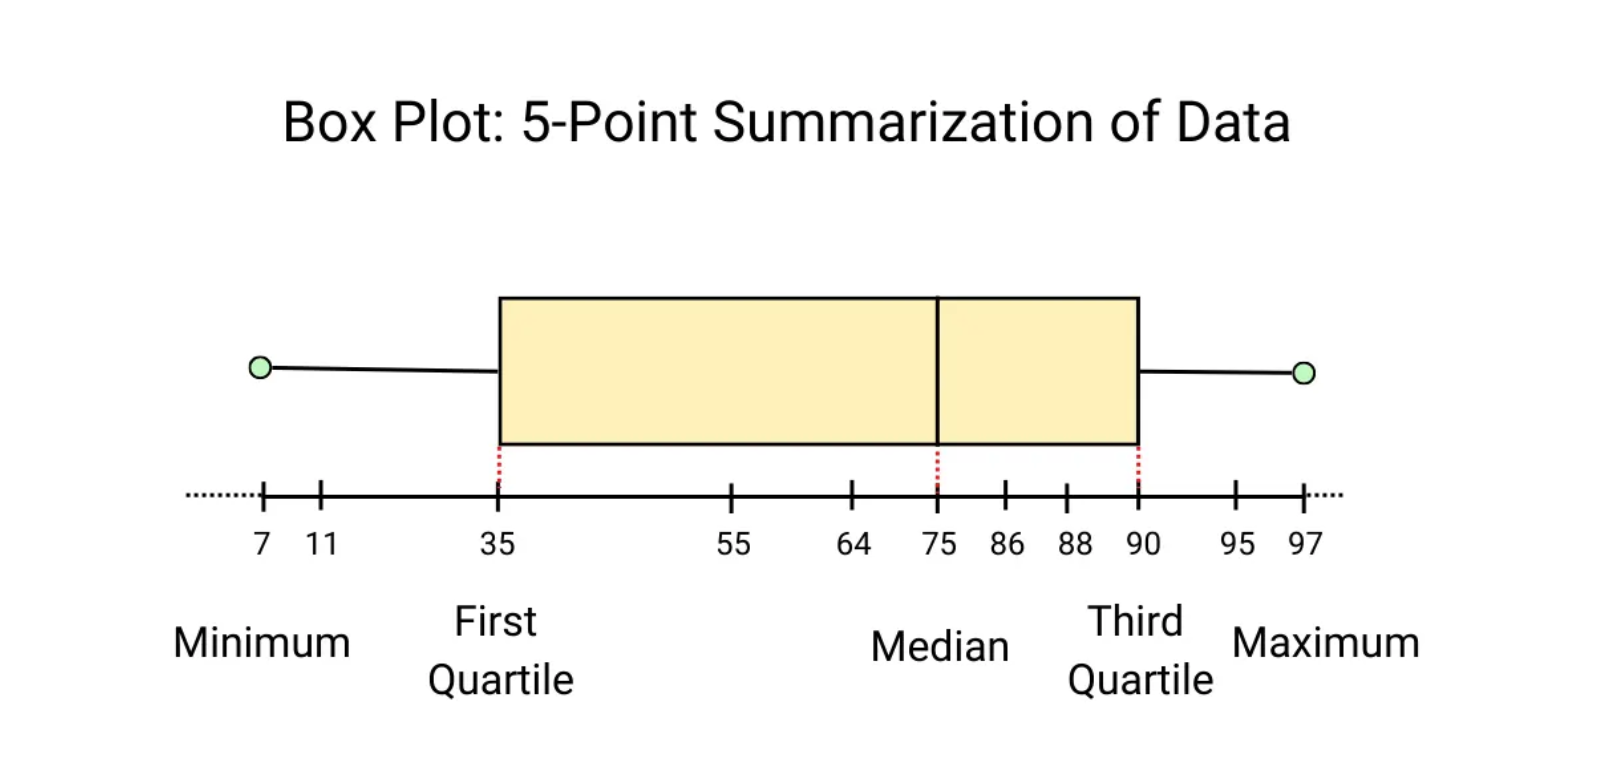

https://medium.com/enjoy-algorithm/box-plot-using-python-data-summary-by-5-numbers-614a80bf2ba1

<h2> Exercise 8 </h2>

Concatenate the DataFrames SupType_1 and SupType_2 to create a new DataFrame
Grc_Concat_df and sort it in ascending order based on the column Item_Outlet_Sales.
What is the Outlet_Location_type of the store with the lowest sales?

In [17]:
Grc_Concat_df = pd.concat([SupType_1, SupType_2], ignore_index=True).sort_values(by="Item_Outlet_Sales")
Grc_Concat_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1039,20.500,Low Fat,0.143164,Household,34.9190,1987,High,Tier 3,Supermarket Type1,73.2380
2383,6.635,Regular,0.046278,Frozen Foods,36.7506,2009,Medium,Tier 3,Supermarket Type2,75.9012
2366,6.320,Low Fat,0.012770,Meat,39.9822,2009,Medium,Tier 3,Supermarket Type2,78.5644
1211,19.250,Low Fat,0.108030,Household,32.4558,1997,Small,Tier 1,Supermarket Type1,101.8674
2194,6.215,Low Fat,0.012168,Fruits and Vegetables,37.4848,1999,Medium,Tier 1,Supermarket Type1,111.8544


<h2> Exercise 9 </h2>

Using columns Outlet_Size and Outlet_Location_Type to create a multiple index for
Grc_Concat_df.

In [18]:
#Using columns Outlet_Size and Outlet_Location_Type to create a multiple index for Grc_Concat_df.
Grc_Concat_df.set_index(['Outlet_Size', 'Outlet_Location_Type'], inplace=True)

#demonstrate that the action took place
print(Grc_Concat_df.index)


MultiIndex([(  'High', 'Tier 3'),
            ('Medium', 'Tier 3'),
            ('Medium', 'Tier 3'),
            ( 'Small', 'Tier 1'),
            ('Medium', 'Tier 1'),
            ( 'Small', 'Tier 2'),
            ('Medium', 'Tier 3'),
            ('Medium', 'Tier 3'),
            (  'High', 'Tier 3'),
            ( 'Small', 'Tier 2'),
            ...
            ( 'Small', 'Tier 1'),
            ('Medium', 'Tier 1'),
            ( 'Small', 'Tier 2'),
            ( 'Small', 'Tier 1'),
            (  'High', 'Tier 3'),
            ( 'Small', 'Tier 2'),
            ( 'Small', 'Tier 1'),
            ( 'Small', 'Tier 1'),
            ( 'Small', 'Tier 1'),
            (  'High', 'Tier 3')],
           names=['Outlet_Size', 'Outlet_Location_Type'], length=2743)


<h2> Exercise 10 </h2>

Cut the column Item_Weight of Grc_Concat_df into 10 buckets and compute each bucket's
mean, minimum, maximum, and count.

In [19]:
# Cut the column Item_Weight of Grc_Concat_df into 10 buckets and compute each bucket's mean, minimum, maximum, and count.
Grc_Concat_df['Item_Weight_Binned'] = pd.cut(Grc_Concat_df['Item_Weight'], bins=10)
blabla = Grc_Concat_df.groupby('Item_Weight_Binned')['Item_Weight'].agg(['mean', 'min', 'max', 'count'])

print(blabla)

                         mean     min     max  count
Item_Weight_Binned                                  
(4.538, 6.234]       5.618919   4.555   6.215    185
(6.234, 7.914]       7.111354   6.235   7.905    336
(7.914, 9.594]       8.733872   7.930   9.500    328
(9.594, 11.273]     10.341739   9.600  11.150    253
(11.273, 12.952]    12.090612  11.300  12.850    286
(12.952, 14.632]    13.728602  13.000  14.600    236
(14.632, 16.312]    15.491924  14.650  16.250    291
(16.312, 17.991]    17.181463  16.350  17.850    294
(17.991, 19.671]    18.853226  18.000  19.600    279
(19.671, 21.35]     20.369412  19.700  21.350    255


C:\Users\PerEr\AppData\Local\Temp\ipykernel_27604\971013901.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  blabla = Grc_Concat_df.groupby('Item_Weight_Binned')['Item_Weight'].agg(['mean', 'min', 'max', 'count'])
